In [11]:
### Problem Statement

# XYZ company's 2014 to 2018 Sales Data to identify key revenue and profit drivers across products, channels, and regions, cover seasonal trends and outliers, and align performance against budgets.
# use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration.



In [12]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)


In [14]:
# assign dataframe to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_products = sheets['Products']
df_budgets = sheets['2017 Budgets']

In [15]:
print('df_sales.shape =', df_sales.shape)
print('df_customers.shape =', df_customers.shape)
print('df_regions.shape =', df_regions.shape)
print('df_state_reg.shape =', df_state_reg.shape)
print('df_products.shape =', df_products.shape)
print('df_budgets.shape =', df_budgets.shape)

df_sales.shape = (64104, 12)
df_customers.shape = (175, 2)
df_regions.shape = (994, 15)
df_state_reg.shape = (49, 3)
df_products.shape = (30, 2)
df_budgets.shape = (30, 2)


In [16]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [17]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [18]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [19]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [20]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [21]:
new_header = df_state_reg.iloc[0]
df_state_reg = df_state_reg[1:]
df_state_reg.columns = new_header

In [22]:
df_state_reg.head(5)

,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West


In [23]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [24]:
## Data Cleaning

In [25]:
## Merge sales with customers

df = df_sales.merge(df_customers, how='left', left_on='Customer Name Index', right_on='Customer Index')


In [26]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [27]:
# merging products

df = df.merge(df_products, how='left', left_on='Product Description Index', right_on='Index')

In [28]:
# mergin regions

df = df.merge(df_regions, how='left', left_on='Delivery Region Index', right_on='id')

In [29]:
# merging state regions

df = df.merge(df_state_reg, how='left', left_on='state_code', right_on='State Code')

In [30]:
df.to_csv('Sales Analysis.csv')

In [31]:
# merging budgets

df = df.merge(df_budgets, how='left', on='Product Name')

In [32]:
# Customer Index
# Index
# id
# water_area
# State Code
# State


## Cleaning up the redundant columns

cols_to_drop = ['Customer Index', 'Index', 'id', 'water_area', 'State Code', 'State']

df = df.drop(columns = cols_to_drop, errors='ignore')

In [33]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,America/New York,Northeast,1085037.329


In [34]:
# converting all columns names to lower case

df.columns = df.columns.str.lower()

In [35]:
df.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,latitude,longitude,area_code,population,households,median_income,land_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,America/New York,Northeast,1085037.329


In [36]:
# selecting the important columns to keep

cols_to_keep = ['ordernumber','orderdate','channel','warehouse code','order quantity',
                'unit price','line total','total unit cost','customer names',
                'product name','name','county','state_code','state','type','region',
                'latitude','longitude','2017 budgets']


In [37]:
df = df[cols_to_keep]

In [38]:
df.head(5)

,ordernumber,orderdate,channel,warehouse code,order quantity,unit price,line total,total unit cost,customer names,product name,name,county,state_code,state,type,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,GA,Georgia,City,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Distributor,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,IN,Indiana,City,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,CA,California,City,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Export,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,IN,Indiana,City,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Wholesale,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,CT,Connecticut,Town,Northeast,41.77524,-72.52443,1085037.329


In [39]:
# renaming the columns

df = df.rename(columns={'2017 budgets':'budget',
                        'orderdate':'order_date',
                        'ordernumber':'order_number',
                        'warehouse code':'warehouse_code',
                        'order quantity':'order_quantity',
                        'unit price':'unit_price',
                        'line total':'revenue',
                        'total unit cost':'cost',
                        'customer names':'customer_name',
                        'product name':'product_name',
                        'latitude':'lat',
                        'longitude':'long'
                        })

In [40]:
# Blanking out budgets for non 2017 orders

df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# line total is revenue
df[['order_date','product_name','revenue','budget']]

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
...,...,...,...,...
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN


In [41]:
df.head(1)

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,cost,customer_name,product_name,name,county,state_code,state,type,region,lat,long,budget
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,GA,Georgia,City,South,32.08354,-81.09983,NaN


In [42]:
df.to_csv('final.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   warehouse_code  64104 non-null  object        
 4   order_quantity  64104 non-null  int64         
 5   unit_price      64104 non-null  float64       
 6   revenue         64104 non-null  float64       
 7   cost            64104 non-null  float64       
 8   customer_name   64104 non-null  object        
 9   product_name    64104 non-null  object        
 10  name            64104 non-null  object        
 11  county          64104 non-null  object        
 12  state_code      64104 non-null  object        
 13  state           64104 non-null  object        
 14  type            64104 non-null  object        
 15  re

In [44]:
# filtering the records to the year 2917

df_2017 = df[df['order_date'].dt.year == 2017]

In [45]:
df_2017.isnull().sum()

,0
order_number,0
order_date,0
channel,0
warehouse_code,0
order_quantity,0
unit_price,0
revenue,0
cost,0
customer_name,0
product_name,0


In [46]:
df_2017

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,cost,customer_name,product_name,name,county,state_code,state,type,region,lat,long,budget
46363,SO - 0002544,2017-01-01,Wholesale,NXH382,6,1239.5,7437.0,1028.785,NCS Group,Product 30,Union City,Hudson County,NJ,New Jersey,City,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,NXH382,5,1829.1,9145.5,1207.206,Epic Group,Product 13,Grand Junction,Mesa County,CO,Colorado,City,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,NXH382,9,2412.0,21708.0,1664.280,State Ltd,Product 15,Inglewood,Los Angeles County,CA,California,City,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,GUT930,8,904.5,7236.0,750.735,Fivebridge Ltd,Product 8,Dubuque,Dubuque County,IA,Iowa,City,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,NXH382,12,1112.2,13346.4,811.906,Tagfeed Ltd,Product 2,Spring Hill,Hernando County,FL,Florida,CDP,South,28.47689,-82.52546,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Wholesale,AXW291,9,984.9,8864.1,512.148,Zooveo Company,Product 1,Independence,Jackson County/Clay County,MO,Missouri,City,Midwest,39.08547,-94.35210,3016489.209
61622,SO - 0004785,2017-12-31,Wholesale,GUT930,12,201.0,2412.0,90.450,Wordware Company,Product 3,Philadelphia,Philadelphia County,PA,Pennsylvania,City,Northeast,39.95234,-75.16379,2642352.432
61623,SO - 0004950,2017-12-31,Distributor,AXW291,9,3825.7,34431.3,3098.817,Dynazzy Company,Product 6,Port Orange,Volusia County,FL,Florida,City,South,29.13832,-80.99561,1672229.416
61624,SO - 0006829,2017-12-31,Distributor,GUT930,5,1835.8,9179.0,972.974,Pixoboo Corp,Product 6,Milford,New Haven County,CT,Connecticut,City,Northeast,41.22509,-73.06111,1672229.416


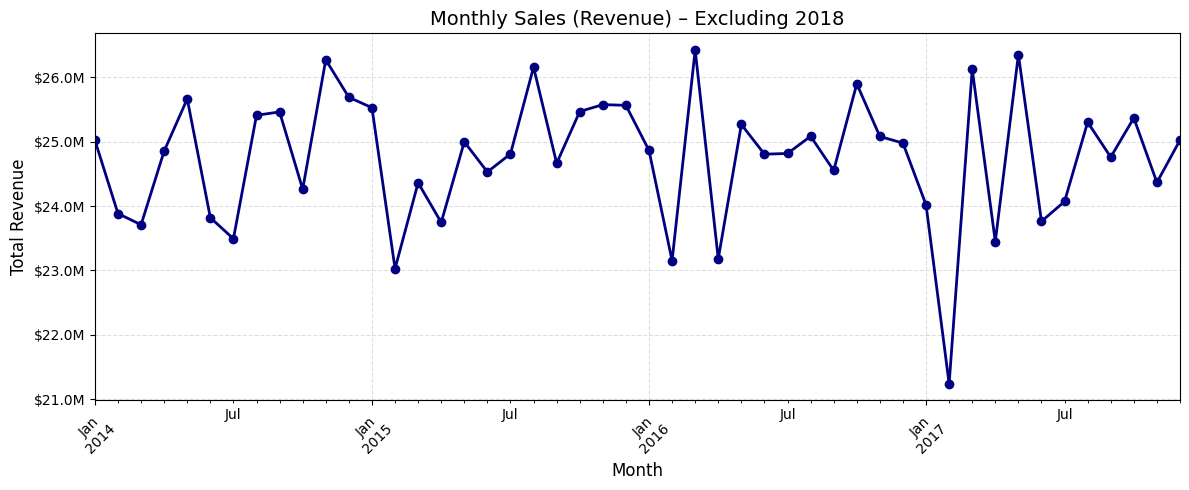

In [57]:

## EDA

# 1. monthly revenue of each year

# year 2018 is removed as it only has the data for january, that creates a false graph in favour of january

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out year 2018
df_filtered = df[df['order_date'].dt.year != 2018]

# Group by year-month and sum revenue (excluding 2018)
monthly_sales = df_filtered.groupby(df_filtered['order_date'].dt.to_period('M'))['revenue'].sum()

# Format function for y-axis (K, M, B)
def format_revenue(x, pos):
    if x >= 1e9:
        return f'${x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'${x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'${x / 1e3:.0f}K'
    else:
        return f'${x:.0f}'

# Plot
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', color='navy', linewidth=2, markersize=6)

# Apply the smart formatting to y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_revenue))

plt.title('Monthly Sales (Revenue) – Excluding 2018', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4031664267.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['order_date'].dt.month_name()


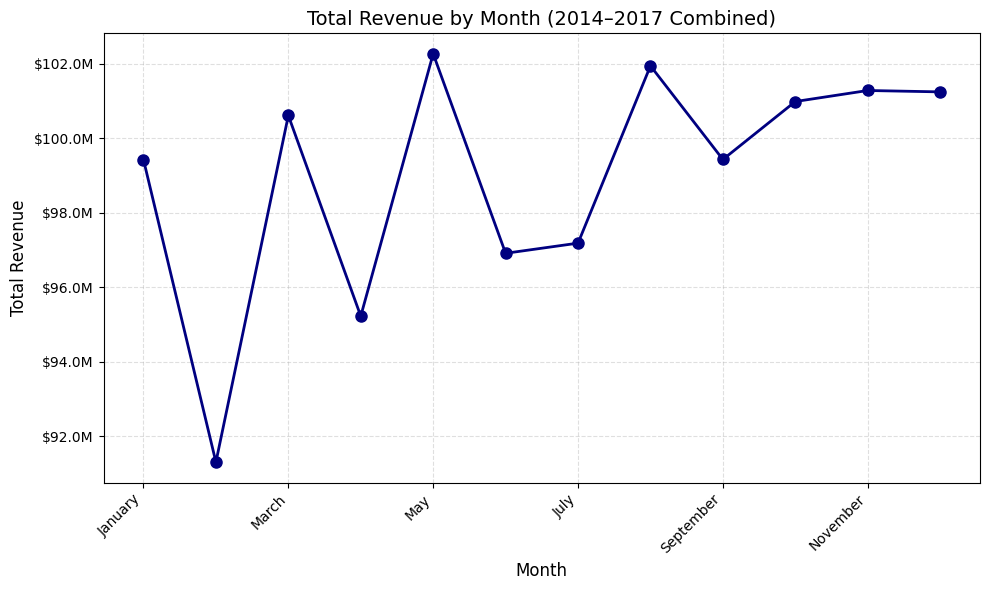

In [61]:

# 2. monthly revenue of EVERY year combined

# year 2018 is removed as it only has the data for january, that creates a false graph in favour of january

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter only years 2014 to 2017
df_filtered = df[df['order_date'].dt.year.between(2014, 2017)]

# Extract month name
df_filtered['month'] = df_filtered['order_date'].dt.month_name()

# Sum revenue by month (combined across 2014–2017)
monthly_total = df_filtered.groupby('month')['revenue'].sum()

# Correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_total = monthly_total.reindex(month_order)

# Format function for y-axis (K, M, B)
def format_revenue(x, pos):
    if x >= 1e9:
        return f'${x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'${x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'${x / 1e3:.0f}K'
    else:
        return f'${x:.0f}'

# Plot line chart
plt.figure(figsize=(10, 6))
monthly_total.plot(marker='o', color='navy', linewidth=2, markersize=8)

# Apply revenue formatting
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_revenue))

plt.title('Total Revenue by Month (2014–2017 Combined)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
# removing incomplete data of year 2018 from df for accuracy

import pandas as pd

# Ensure order_date is datetime (safe to run even if already done)
df['order_date'] = pd.to_datetime(df['order_date'])

# Permanently keep only rows where year is not 2018
df = df[df['order_date'].dt.year != 2018].copy().reset_index(drop=True)

# Optional quick confirmation (you can remove these lines later)
print("Years remaining:", sorted(df['order_date'].dt.year.unique()))
print("Number of rows after removal:", df.shape[0])

Years remaining: [np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017)]
Number of rows after removal: 61626


Top 10 Products by Revenue:
product_name revenue_formatted     revenue
  Product 26          $112.45M 112454990.9
  Product 25          $105.72M 105715762.4
  Product 13           $75.19M  75190019.7
  Product 14           $72.52M  72516666.1
   Product 5           $68.03M  68032711.2
  Product 15           $64.93M  64933726.7
   Product 2           $54.98M  54976803.1
   Product 4           $54.56M  54558669.5
   Product 1           $53.68M  53678832.2
   Product 3           $49.94M  49935227.3


/tmp/ipython-input-1382936064.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


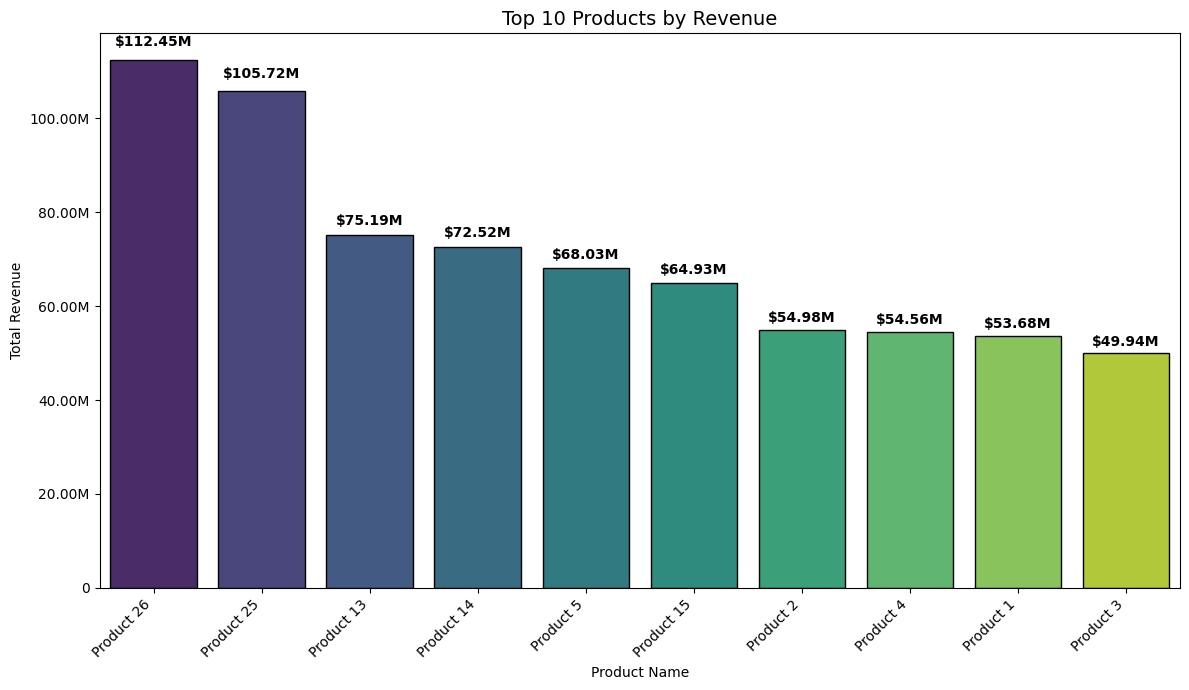

In [71]:
# 3. Top 10 products by revenue

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate total revenue per product → top 10
top_products = (
    df.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Format revenue with units (K, M, B)
def format_revenue(x):
    if x >= 1e9:
        return f'${x / 1e9:.2f}B'
    elif x >= 1e6:
        return f'${x / 1e6:.2f}M'
    elif x >= 1e3:
        return f'${x / 1e3:.0f}K'
    else:
        return f'${x:.0f}'

top_products['revenue_formatted'] = top_products['revenue'].apply(format_revenue)

# Display formatted table
print("Top 10 Products by Revenue:")
print(top_products[['product_name', 'revenue_formatted', 'revenue']]
      .to_string(index=False))

# Formatter for y-axis (shows K, M, B)
def revenue_formatter(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.2f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.2f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}K'
    else:
        return f'{x:.0f}'

# Seaborn vertical bar plot with colorful bars
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_products,
    x='product_name',
    y='revenue',
    palette='viridis',          # colorful gradient
    edgecolor='black'
)

# Apply smart formatter to y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(revenue_formatter))

# Add value labels on top of bars
for i, (val, fmt) in enumerate(zip(top_products['revenue'], top_products['revenue_formatted'])):
    plt.text(i, val + val*0.02, fmt, ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

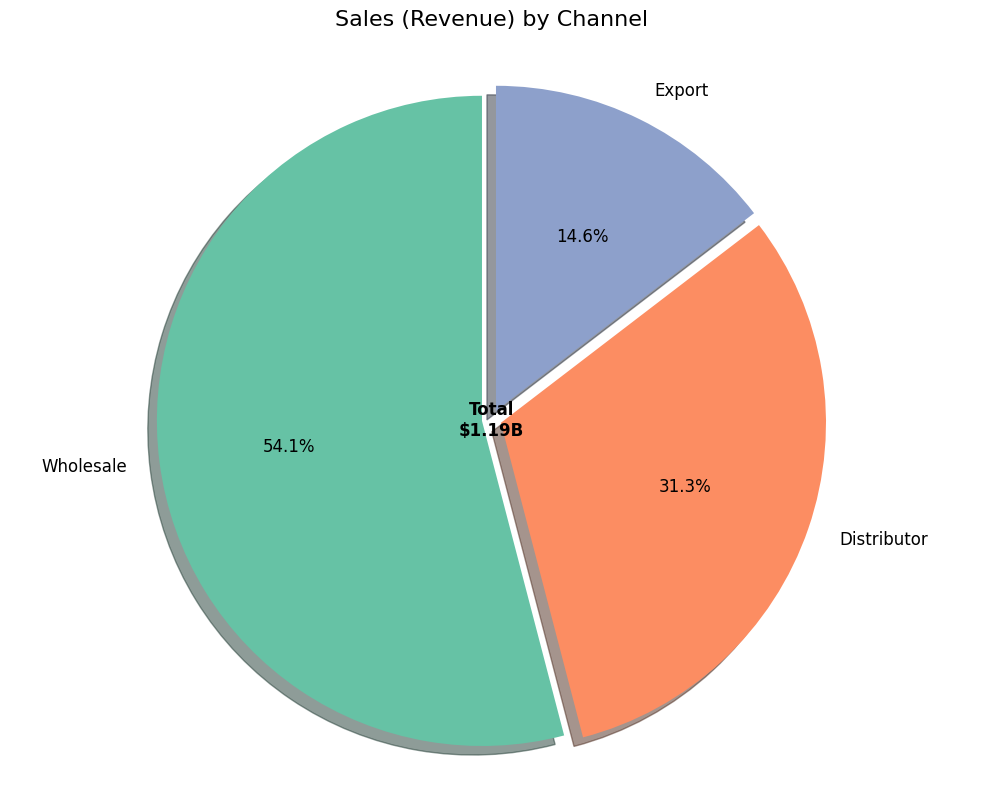

Revenue by Channel:
    channel    label     revenue
  Wholesale $642.22M 642218094.9
Distributor $372.25M 372247598.1
     Export $173.37M 173373253.5


In [73]:
# 4. sales by channel pie chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total revenue by channel
channel_sales = df.groupby('channel')['revenue'].sum().reset_index()

# Optional: sort by revenue descending
channel_sales = channel_sales.sort_values('revenue', ascending=False)

# Format revenue for labels (K/M/B)
def format_revenue(x):
    if x >= 1e9:
        return f'${x / 1e9:.2f}B'
    elif x >= 1e6:
        return f'${x / 1e6:.2f}M'
    elif x >= 1e3:
        return f'${x / 1e3:.0f}K'
    else:
        return f'${x:.0f}'

channel_sales['label'] = channel_sales['revenue'].apply(format_revenue)

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    channel_sales['revenue'],
    labels=channel_sales['channel'],
    autopct='%1.1f%%',               # show percentage
    startangle=90,
    textprops={'fontsize': 12},
    colors=sns.color_palette('Set2', len(channel_sales)),  # nice colorful palette
    shadow=True,
    explode=[0.03] * len(channel_sales)  # slight separation
)

# Add title and equal aspect ratio
plt.title('Sales (Revenue) by Channel', fontsize=16, pad=20)
plt.axis('equal')  # perfect circle

# Optional: add total revenue in center or legend
total_revenue = channel_sales['revenue'].sum()
total_formatted = format_revenue(total_revenue)
plt.text(0, 0, f'Total\n{total_formatted}',
         ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary table
print("Revenue by Channel:")
print(channel_sales[['channel', 'label', 'revenue']].to_string(index=False))

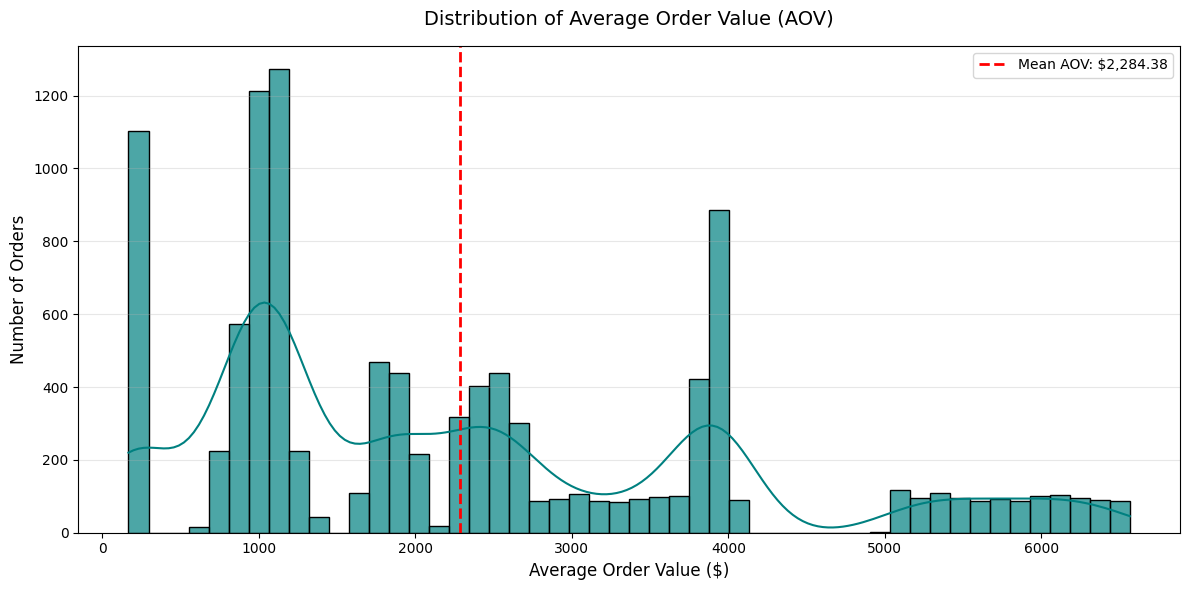

Average Order Value Statistics:
count    10684.00
mean      2284.38
std       1663.66
min        167.50
25%       1031.80
50%       1855.90
75%       3606.28
max       6566.00
Name: aov, dtype: float64


In [75]:
# 5. average order value (AOV) distribution

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate AOV per order
order_summary = df.groupby('order_number').agg({
    'revenue': 'sum',
    'order_quantity': 'sum'
}).reset_index()

order_summary['aov'] = order_summary['revenue'] / order_summary['order_quantity']

# 2. Remove invalid rows (zero quantity or NaN)
order_summary = order_summary[order_summary['order_quantity'] > 0]
order_summary = order_summary.dropna(subset=['aov'])

# 3. Plot distribution
plt.figure(figsize=(12, 6))

# Histogram + KDE
sns.histplot(
    data=order_summary,
    x='aov',
    bins=50,
    kde=True,
    color='teal',
    edgecolor='black',
    alpha=0.7
)

# Add vertical line for mean
mean_aov = order_summary['aov'].mean()
plt.axvline(mean_aov, color='red', linestyle='--', linewidth=2,
            label=f'Mean AOV: ${mean_aov:,.2f}')

# Formatting
plt.title('Distribution of Average Order Value (AOV)', fontsize=14, pad=15)
plt.xlabel('Average Order Value ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()

# Optional: zoom in on common range (uncomment if most values are small)
# plt.xlim(0, order_summary['aov'].quantile(0.99))

plt.show()

# Quick summary statistics
print("Average Order Value Statistics:")
print(order_summary['aov'].describe().round(2))

Top 10 States by Total Revenue:
state_code  Total Revenue  Order Count
        CA    220262118.1         7464
        IL    107126279.9         4469
        FL     87005067.7         3717
        TX     80774114.6         3460
        NY     52878101.8         2450
        IN     52314698.8         2465
        NJ     45124580.4         2084
        CT     42673995.1         2002
        MI     37806177.1         1829
        MA     33573231.0         1583

Top 10 States by Order Count:
state_code  Order Count  Total Revenue
        CA         7464    220262118.1
        IL         4469    107126279.9
        FL         3717     87005067.7
        TX         3460     80774114.6
        IN         2465     52314698.8
        NY         2450     52878101.8
        NJ         2084     45124580.4
        CT         2002     42673995.1
        MI         1829     37806177.1
        MA         1583     33573231.0


/tmp/ipython-input-1258596061.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_revenue, x='Total Revenue', y='state_code',
/tmp/ipython-input-1258596061.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_orders, x='Order Count', y='state_code',


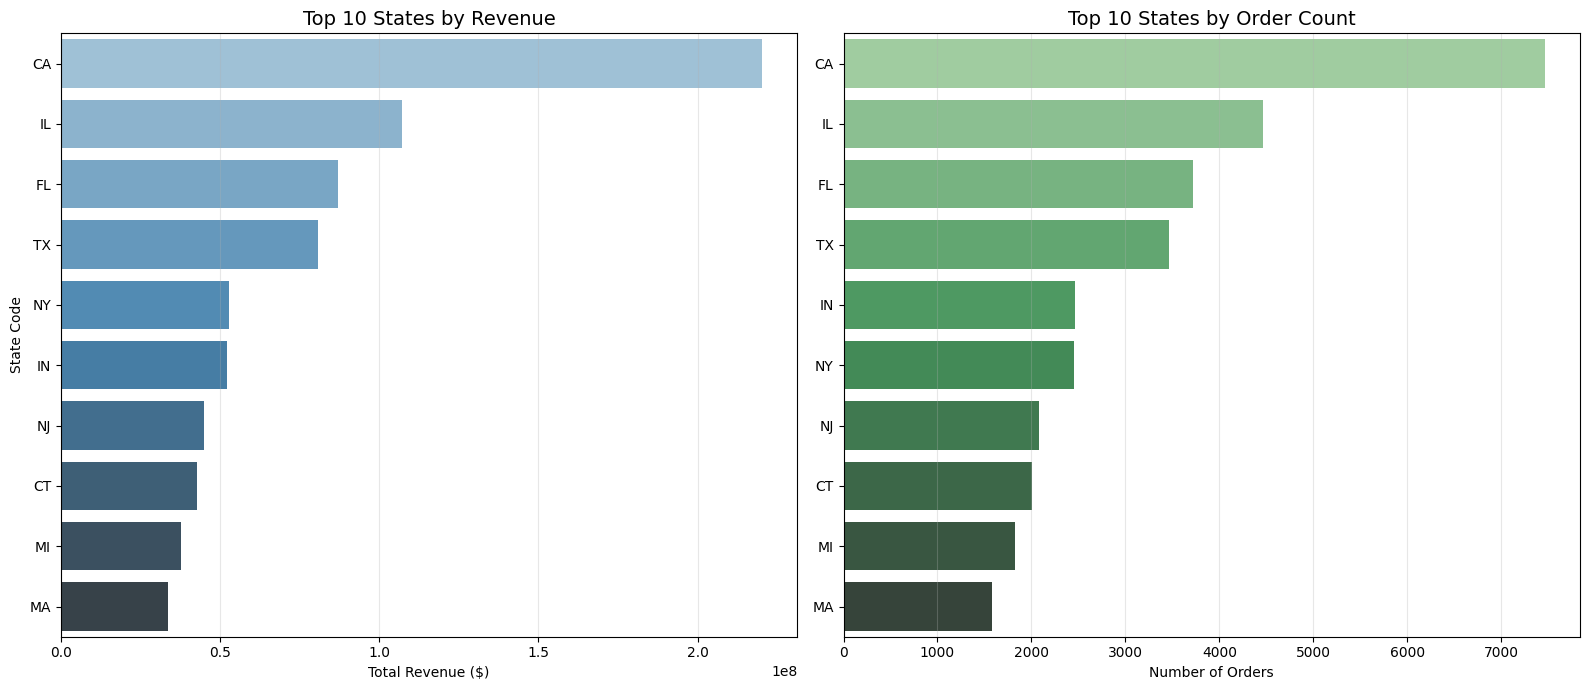

In [80]:
# 6. Top 10 States by revenue and order count



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Aggregate: total revenue + unique order count per state
state_summary = df.groupby('state_code').agg({
    'revenue': 'sum',
    'order_number': 'nunique'          # number of unique orders
}).reset_index()

state_summary = state_summary.rename(columns={
    'revenue': 'Total Revenue',
    'order_number': 'Order Count'
})

# 2. Top 10 by Revenue
top_revenue = state_summary.sort_values('Total Revenue', ascending=False).head(10)

# 3. Top 10 by Order Count
top_orders = state_summary.sort_values('Order Count', ascending=False).head(10)

# 4. Display tables
print("Top 10 States by Total Revenue:")
print(top_revenue[['state_code', 'Total Revenue', 'Order Count']]
      .to_string(index=False))

print("\nTop 10 States by Order Count:")
print(top_orders[['state_code', 'Order Count', 'Total Revenue']]
      .to_string(index=False))

# 5. Optional: Visual bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar plot - Revenue
sns.barplot(data=top_revenue, x='Total Revenue', y='state_code',
            palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 10 States by Revenue', fontsize=14)
axes[0].set_xlabel('Total Revenue ($)')
axes[0].set_ylabel('State Code')
axes[0].grid(axis='x', alpha=0.3)

# Bar plot - Order Count
sns.barplot(data=top_orders, x='Order Count', y='state_code',
            palette='Greens_d', ax=axes[1])
axes[1].set_title('Top 10 States by Order Count', fontsize=14)
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


Bottom 10 States by Total Revenue:
state_code  Total Revenue  Order Count
        DE      1226703.0           69
        ME      1534360.3           70
        DC      1574580.4           79
        SD      1655931.8           98
        WY      1686704.9           97
        NH      2268653.5          120
        MS      3161508.9          177
        MT      3282021.8          173
        RI      3444356.1          184
        ND      3763932.7          194

Bottom 10 States by Order Count:
state_code  Order Count  Total Revenue
        DE           69      1226703.0
        ME           70      1534360.3
        DC           79      1574580.4
        WY           97      1686704.9
        SD           98      1655931.8
        NH          120      2268653.5
        MT          173      3282021.8
        MS          177      3161508.9
        RI          184      3444356.1
        ND          194      3763932.7


/tmp/ipython-input-2994461614.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_revenue, x='Total Revenue', y='state_code',
/tmp/ipython-input-2994461614.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_orders, x='Order Count', y='state_code',


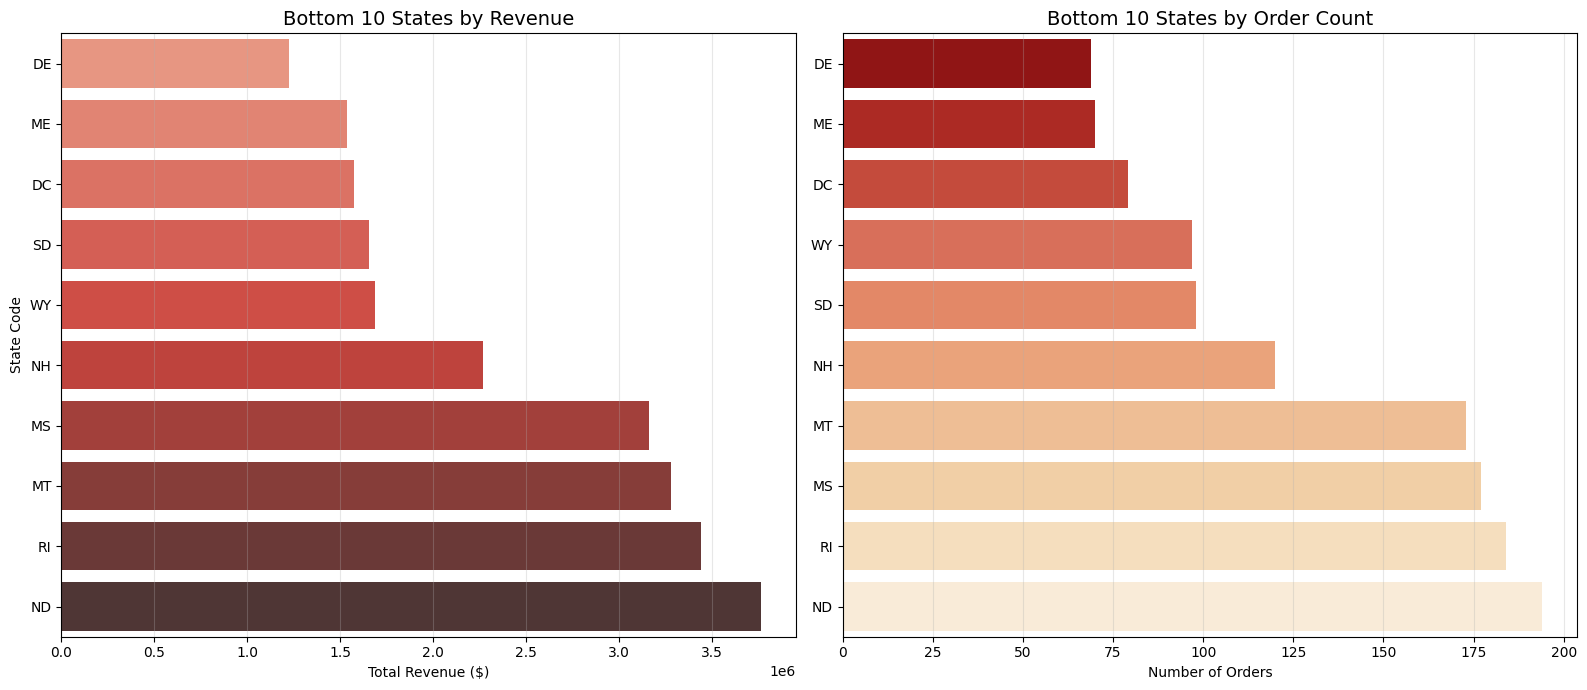

In [82]:
# 7. bottom 10 states by revenue and order count

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate revenue and order count per state
state_summary = df.groupby('state_code').agg({
    'revenue': 'sum',
    'order_number': 'nunique'
}).reset_index()

state_summary = state_summary.rename(columns={
    'revenue': 'Total Revenue',
    'order_number': 'Order Count'
})

# Bottom 10 by Revenue
bottom_revenue = state_summary.sort_values('Total Revenue', ascending=True).head(10)

# Bottom 10 by Order Count
bottom_orders = state_summary.sort_values('Order Count', ascending=True).head(10)

# Display tables
print("Bottom 10 States by Total Revenue:")
print(bottom_revenue[['state_code', 'Total Revenue', 'Order Count']]
      .to_string(index=False))

print("\nBottom 10 States by Order Count:")
print(bottom_orders[['state_code', 'Order Count', 'Total Revenue']]
      .to_string(index=False))

# Side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left: Bottom 10 by Revenue
sns.barplot(data=bottom_revenue, x='Total Revenue', y='state_code',
            palette='Reds_d', ax=axes[0])
axes[0].set_title('Bottom 10 States by Revenue', fontsize=14)
axes[0].set_xlabel('Total Revenue ($)')
axes[0].set_ylabel('State Code')
axes[0].grid(axis='x', alpha=0.3)

# Right: Bottom 10 by Order Count
sns.barplot(data=bottom_orders, x='Order Count', y='state_code',
            palette='OrRd_r', ax=axes[1])
axes[1].set_title('Bottom 10 States by Order Count', fontsize=14)
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Profit Margin by Channel (Total Revenue Basis):
    channel     revenue        cost  total_profit  profit_margin
     Export 173373253.5 12742399.96  160630853.54          92.65
  Wholesale 642218094.9 47716293.36  594501801.54          92.57
Distributor 372247598.1 27782824.27  344464773.83          92.54


/tmp/ipython-input-524766007.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


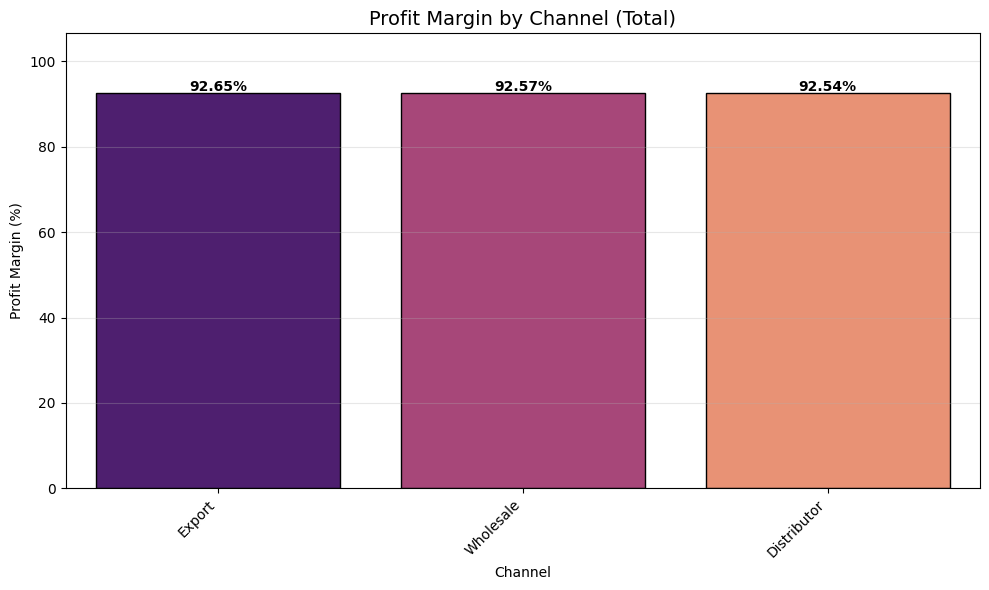

In [88]:
# 8. average profit margin by channel

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate total revenue & total cost by channel
channel_agg = df.groupby('channel').agg({
    'revenue': 'sum',
    'cost': 'sum'
}).reset_index()

channel_agg['total_profit'] = channel_agg['revenue'] - channel_agg['cost']
channel_agg['profit_margin'] = (channel_agg['total_profit'] / channel_agg['revenue']) * 100

channel_agg = channel_agg.sort_values('profit_margin', ascending=False)

# Table
print("Profit Margin by Channel (Total Revenue Basis):")
print(channel_agg[['channel', 'revenue', 'cost', 'total_profit', 'profit_margin']]
      .round(2).to_string(index=False))

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=channel_agg,
    x='channel',
    y='profit_margin',
    palette='magma',
    edgecolor='black'
)

for i, v in enumerate(channel_agg['profit_margin']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.title('Profit Margin by Channel (Total)', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Profit Margin (%)')
plt.ylim(0, channel_agg['profit_margin'].max() * 1.15)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Regions ranked by Total Revenue (Most Profitable):
   region Revenue Formatted     revenue
     West          $357.99M 357994192.3
    South          $321.67M 321673157.3
  Midwest          $308.32M 308316740.8
Northeast          $199.85M 199854856.1


/tmp/ipython-input-716875061.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


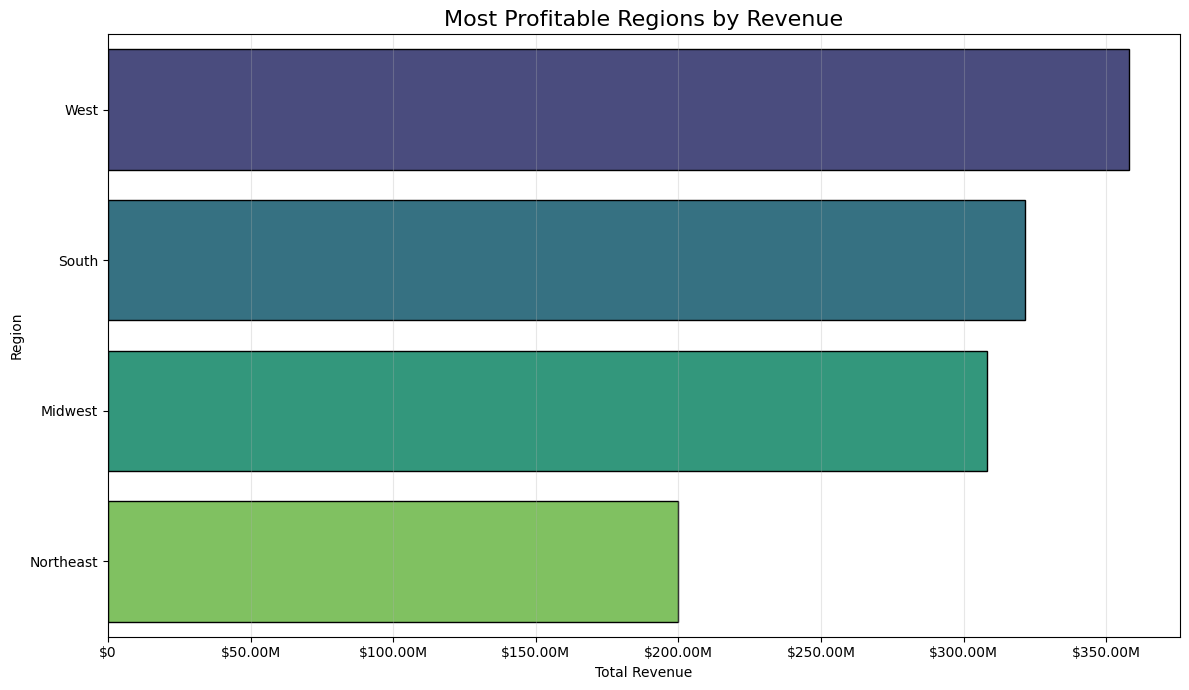

In [87]:
# 9. most profitable regions

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate revenue by region
region_profit = df.groupby('region').agg({
    'revenue': 'sum'
}).reset_index()

# Sort descending (most profitable first)
region_profit = region_profit.sort_values('revenue', ascending=False)

# Optional: format revenue
def format_revenue(x):
    if x >= 1e9:
        return f'${x / 1e9:.2f}B'
    elif x >= 1e6:
        return f'${x / 1e6:.2f}M'
    elif x >= 1e3:
        return f'${x / 1e3:.0f}K'
    else:
        return f'${x:.0f}'

region_profit['Revenue Formatted'] = region_profit['revenue'].apply(format_revenue)

# Display table
print("Regions ranked by Total Revenue (Most Profitable):")
print(region_profit[['region', 'Revenue Formatted', 'revenue']]
      .to_string(index=False))

# Bar chart - Top regions
plt.figure(figsize=(12, 7))
sns.barplot(
    data=region_profit.head(10),  # top 10
    x='revenue',
    y='region',
    palette='viridis',
    edgecolor='black'
)

plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: format_revenue(x))
)

plt.title('Most Profitable Regions by Revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-551393562.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


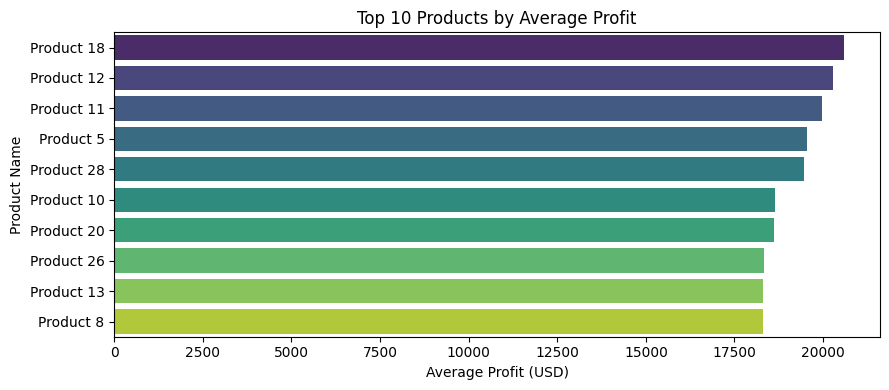

In [95]:
# Top 10 products by average profit margin %

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute average profit per product and get top 10
top_margin = (
    df.groupby('product_name')['profit']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot horizontal bar chart
plt.figure(figsize=(9, 4))
sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    palette='viridis'
)

plt.title('Top 10 Products by Average Profit')
plt.xlabel('Average Profit (USD)')
plt.ylabel('Product Name')

plt.tight_layout()
plt.show()


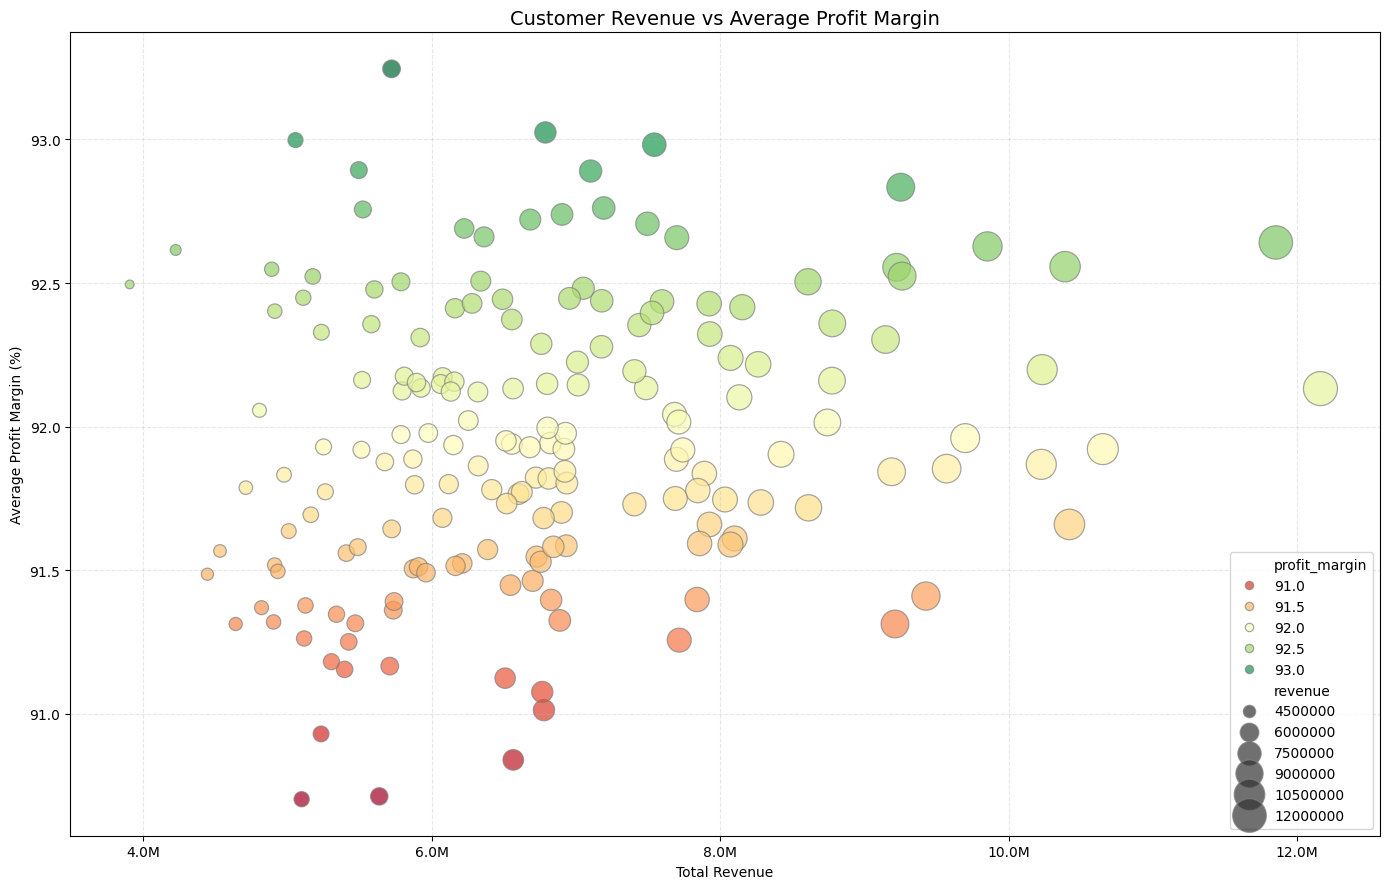

In [98]:
# 11 customer segmentation: revenue vs profit margin

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate profit and margin
df['profit'] = df['revenue'] - df['cost']
df['profit_margin'] = (df['profit'] / df['revenue']) * 100

# Aggregate per customer
customer = df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Formatter for revenue axis (K, M, B)
def revenue_formatter(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}K'
    else:
        return f'{x:.0f}'

# Plot
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(
    data=customer,
    x='revenue',
    y='profit_margin',
    size='revenue',
    hue='profit_margin',
    palette='RdYlGn',
    sizes=(40, 600),
    alpha=0.7,
    edgecolor='gray'
)

# Apply formatter to x-axis
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(revenue_formatter))

plt.title('Customer Revenue vs Average Profit Margin', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

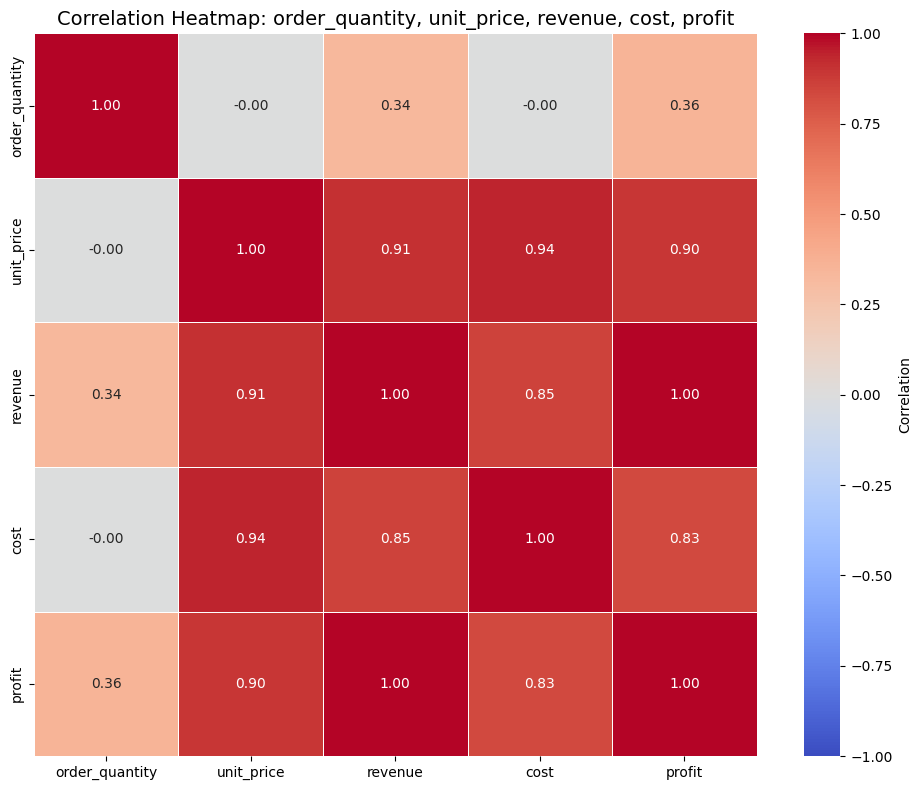

In [105]:
# correlation heatmap of numeric features


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the exact columns you specified
cols = ['order_quantity', 'unit_price', 'revenue', 'cost', 'profit']
numeric = df[cols].copy()

# Calculate correlation matrix
corr = numeric.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.6,
    square=True,
    cbar_kws={'label': 'Correlation'}
)

plt.title('Correlation Heatmap: order_quantity, unit_price, revenue, cost, profit', fontsize=14)
plt.tight_layout()
plt.show()

In [108]:
insights = """
-Unit price is the primary driver of revenue (r = 0.91), meaning most revenue variation comes from selling higher-priced items rather than higher volumes.
-Profit is perfectly aligned with revenue (r = 1.00), indicating that margins remain stable or even improve as revenue increases, with almost no erosion at higher sales levels.
-Cost scales very strongly with unit price (r = 0.94), showing that higher-priced products carry proportionally higher costs, likely due to more expensive materials or production.
-Revenue and cost are tightly linked (r = 0.85), which is expected in a business where higher-value sales also involve higher input costs.
-Order quantity shows only a weak positive relationship with revenue (r = 0.34) and profit (r = 0.36), suggesting that the business is not volume-driven — increasing units sold per order has limited impact on financial performance.
-Order quantity has virtually no correlation with unit price or cost (r ≈ 0.00), confirming that quantity decisions are largely independent of pricing or cost structure.

---Bottom-line observation: This is a price-sensitive business where focusing on higher unit price products drives both revenue and profit far more effectively than pushing higher order quantities.
"""

print(insights)


-Unit price is the primary driver of revenue (r = 0.91), meaning most revenue variation comes from selling higher-priced items rather than higher volumes.
-Profit is perfectly aligned with revenue (r = 1.00), indicating that margins remain stable or even improve as revenue increases, with almost no erosion at higher sales levels.
-Cost scales very strongly with unit price (r = 0.94), showing that higher-priced products carry proportionally higher costs, likely due to more expensive materials or production.
-Revenue and cost are tightly linked (r = 0.85), which is expected in a business where higher-value sales also involve higher input costs.
-Order quantity shows only a weak positive relationship with revenue (r = 0.34) and profit (r = 0.36), suggesting that the business is not volume-driven — increasing units sold per order has limited impact on financial performance.
-Order quantity has virtually no correlation with unit price or cost (r ≈ 0.00), confirming that quantity decisions 

In [109]:
df

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,cost,customer_name,product_name,...,region,lat,long,budget,order_month,month,year_month,hour,profit,profit_margin
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,...,South,32.08354,-81.09983,NaN,2014-01,January,2014-01,0,13170.257,87.833333
1,SO - 0003378,2014-01-01,Distributor,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,...,Midwest,39.61366,-86.10665,NaN,2014-01,January,2014-01,0,24598.782,95.090909
2,SO - 0005126,2014-01-01,Wholesale,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,...,West,37.66243,-121.87468,NaN,2014-01,January,2014-01,0,5184.460,88.333333
3,SO - 0005614,2014-01-01,Export,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,...,Midwest,39.16533,-86.52639,NaN,2014-01,January,2014-01,0,15339.248,93.714286
4,SO - 0005781,2014-01-01,Wholesale,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,...,Northeast,41.77524,-72.52443,NaN,2014-01,January,2014-01,0,17070.930,93.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Wholesale,AXW291,9,984.9,8864.1,512.148,Zooveo Company,Product 1,...,Midwest,39.08547,-94.35210,3016489.209,2017-12,December,2017-12,0,8351.952,94.222222
61622,SO - 0004785,2017-12-31,Wholesale,GUT930,12,201.0,2412.0,90.450,Wordware Company,Product 3,...,Northeast,39.95234,-75.16379,2642352.432,2017-12,December,2017-12,0,2321.550,96.250000
61623,SO - 0004950,2017-12-31,Distributor,AXW291,9,3825.7,34431.3,3098.817,Dynazzy Company,Product 6,...,South,29.13832,-80.99561,1672229.416,2017-12,December,2017-12,0,31332.483,91.000000
61624,SO - 0006829,2017-12-31,Distributor,GUT930,5,1835.8,9179.0,972.974,Pixoboo Corp,Product 6,...,Northeast,41.22509,-73.06111,1672229.416,2017-12,December,2017-12,0,8206.026,89.400000


In [110]:
# exporting final df

df.to_csv('sales.csv')

In [ ]:
# key insights

# 1. stable revenue lies between 23.5 to 25.5
# 2. may is the most revenue generating month and february is the least revenue generating month
# 3. product 26, 25 and 13 are the top 3 products by revenue - 112, 105 and 75 million respectively
# 4. wholesale channel comprises of 54% of the revenue
# 5. average order value (AOV) is $2284.38
# 6. california generates the most amount of revenue $2.5million
# 7. delaware generates the least amount of revenue 1.25million
# 8. west region of the us is the most profitable at $357.99M
# 9. product 18,12 and 11 are top 3 by avg  profit


